# Método de Simulación

### Grupo 8

Javier Darna Sequeiros, Tingyun Wei, Zihao Hong

# Algoritmo de Ziggurat

In [1]:
# imports
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from scipy.integrate import quad
import pandas as pd

import zignor

### 1. Generación de	números y variables aleatorias
Describir el algoritmo de Ziggurat para	distribuciones con función de densidad decreciente y compararlo	con	otros métodos para la generación de	valores	de la normal

In [2]:
def pdf_standard_normal_distribution(x):
    return (1 / (np.sqrt(2 * np.pi))) * np.exp((x ** 2) / -2)

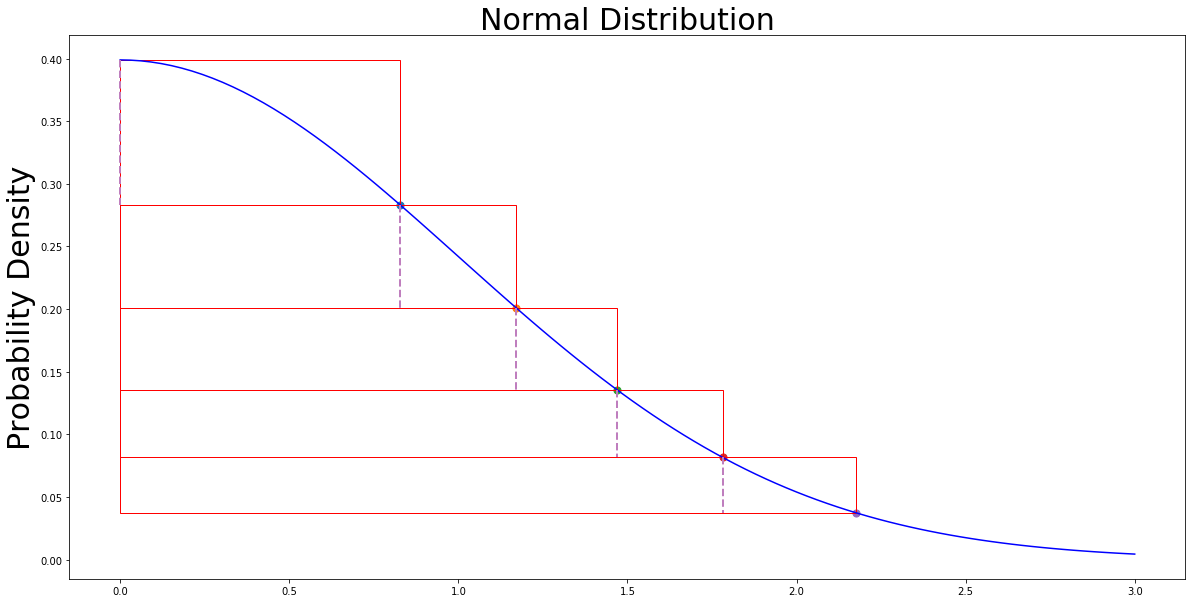

In [3]:
DOMAIN = 3
N = 100
POINT_SIZE = 50
TITLE_SIZE = 30
FIGURE_SIZE = (20, 10)

domain = np.linspace(0, DOMAIN, N) # return a domain from [0, 1] in 100 parts

divisions = [0, 0.8288, 1.1713, 1.4696, 1.7819, 2.1761]

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

# config
ax.set_title('Normal Distribution', size = TITLE_SIZE);
ax.set_ylabel('Probability Density', size = TITLE_SIZE);

ax.plot(domain, list( # domain is the x axis and the rest y axis
    map(
        lambda x: pdf_standard_normal_distribution(x), 
        domain
    )
), color = 'b')
currentAxis = plt.gca()

for i in range(1, len(divisions)):
    y = pdf_standard_normal_distribution(divisions[i]) # calculate its y axis value
    y_prev = pdf_standard_normal_distribution(divisions[i - 1]) # calculate divisions i - 1 y axis value
    
    plt.scatter(divisions[i], y, s = POINT_SIZE) # draw point s is size
    rect = patches.Rectangle((0, y), divisions[i], y_prev - y, linewidth = 1, edgecolor = 'r', fill = None) # draw rectangle
    plt.plot([divisions[i - 1], divisions[i - 1]], [y_prev, y], color = '#BF7EBE', linewidth = 2, linestyle = 'dashed') # draw lines
    
    currentAxis.add_patch(rect) # add rectangle

plt.show()
plt.close()

## Esto es con negrita
Explicaciones

Utilizando el algoritmo	de Ziggurat obtener	una	aproximación de	la tabla de	la tabla de	la distribución normal estándar.	

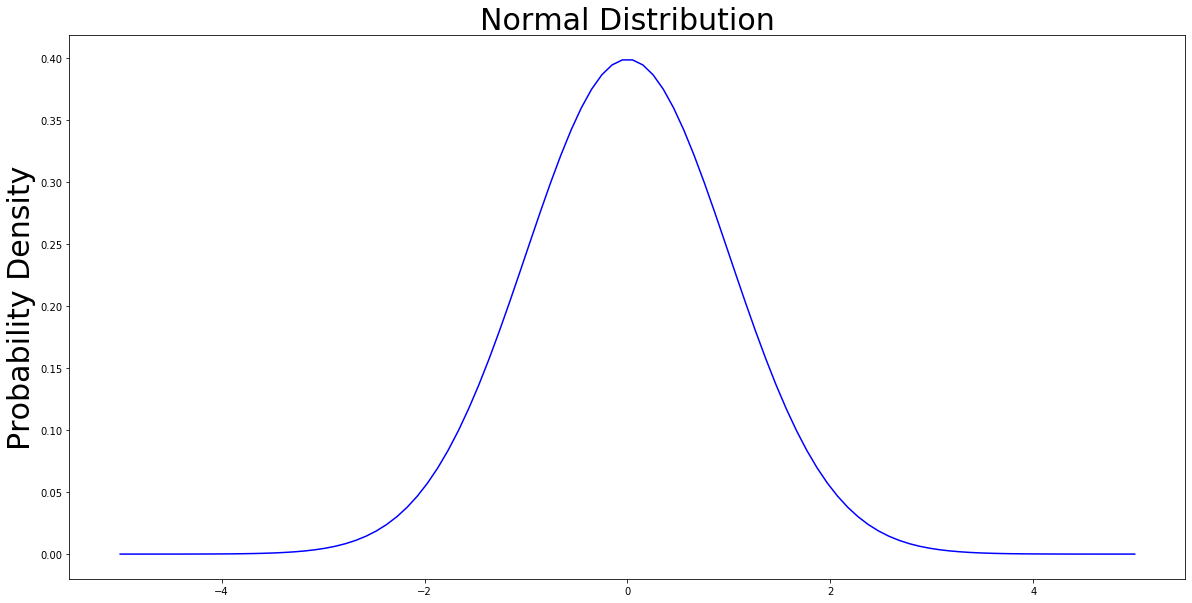

In [4]:
DOMAIN = 5
N = 100
TITLE_SIZE = 30
FIGURE_SIZE = (20, 10)

domain = np.linspace(-DOMAIN, DOMAIN, N) # return a domain from [0, 1] in 100 parts

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

# config
ax.set_title('Normal Distribution', size = TITLE_SIZE);
ax.set_ylabel('Probability Density', size = TITLE_SIZE);

ax.plot(domain, list( # domain is the x axis and the rest y axis
    map(
        lambda x: pdf_standard_normal_distribution(x), 
        domain
    )
), color = 'b')

plt.show()

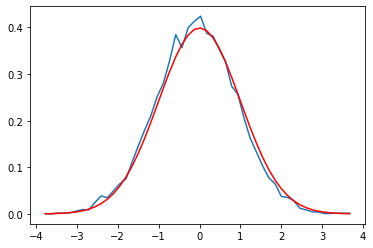

In [29]:
bins = 50
N = 10000

random_numbers = zignor.randn(N)

plt.figure()
hist, bin_edges = np.histogram( random_numbers, bins )
histNorm = hist / 1500 #TODO: encontrar una forma de calcular este 1500
plt.plot( bin_edges[:-1], histNorm )
plt.plot( bin_edges[:-1],
          [pdf_standard_normal_distribution(x) for x in bin_edges[:-1]],
          color = 'r' )
plt.show()

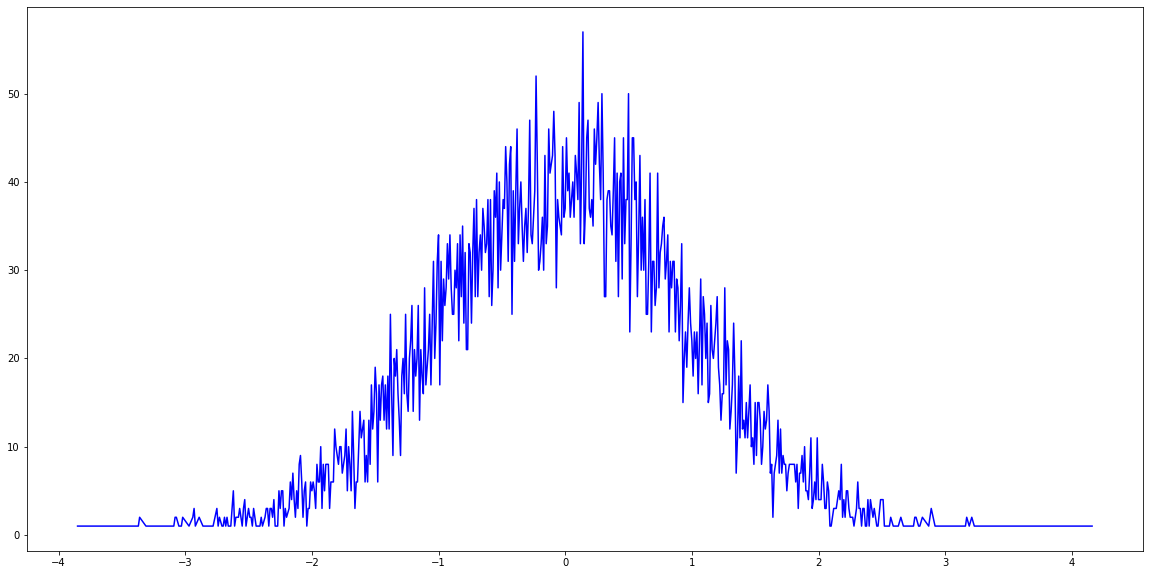

In [34]:
POINT_SIZE = 50
N = 10000

random_numbers = zignor.randn(N)

counter = {}
for rand in random_numbers:
    round_rand_number = np.round(rand, 2) # round the number to 2 decimals
    counter[round_rand_number] = counter.get(round_rand_number, 0) + 1
    
x_axis = sorted(list(counter.keys()))
y_axis = list(map(lambda x : counter[x], x_axis))

fig, ax = plt.subplots(figsize=(FIGURE_SIZE[0], FIGURE_SIZE[1]));

ax.plot(x_axis, y_axis, color = 'b')

plt.show()

In [35]:
standard_normal_table = pd.DataFrame(
    data =[],
    index = np.round(np.arange(0, 1, .1), 2),
    columns = np.round(np.arange(0.00, .1, .01), 2)
)

for index in standard_normal_table.index:
    for column in standard_normal_table.columns:
        z = np.round(index+column, 2)
        value = 0
        for k in np.round(np.arange(min( random_numbers ), z, .01), 2):
            if counter.get( k ) is not None:
                value = value + counter.get(k)
        standard_normal_table.loc[index, column] = value/N
        
standard_normal_table.index = standard_normal_table.index.astype(str)
standard_normal_table.columns = [str(column).ljust(4, '0') for column in standard_normal_table.columns]

standard_normal_table

,0.00,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0.0,0.4966,0.5003,0.5048,0.5087,0.5128,0.5164,0.5202,0.5242,0.5278,0.5321
0.1,0.5362,0.54,0.5449,0.5482,0.5524,0.5581,0.5614,0.5651,0.5696,0.5743
0.2,0.578,0.5816,0.5854,0.5889,0.5935,0.5977,0.6022,0.6071,0.6113,0.6151
0.3,0.6201,0.6242,0.6269,0.6296,0.6334,0.6373,0.6412,0.6447,0.6481,0.652
0.4,0.6565,0.6596,0.6637,0.6664,0.6704,0.6745,0.6774,0.6819,0.6852,0.689
0.5,0.6928,0.6978,0.7001,0.7034,0.7079,0.7124,0.7162,0.7202,0.7229,0.7263
0.6,0.7306,0.7336,0.7372,0.7402,0.744,0.7465,0.749,0.7521,0.7562,0.7585
0.7,0.7616,0.7647,0.7673,0.7701,0.7742,0.777,0.7802,0.7835,0.787,0.7906
0.8,0.7935,0.7966,0.8,0.8023,0.8054,0.8082,0.8113,0.8144,0.8167,0.8196
0.9,0.8224,0.8246,0.8272,0.8305,0.832,0.834,0.8363,0.8382,0.8406,0.8434


### 2. Generación de	números y variables aleatorias
Describir el algoritmo de Ziggurat para	distribuciones con función de densidad decreciente y compararlo	con	otros métodos para la generación de	valores	de la normal

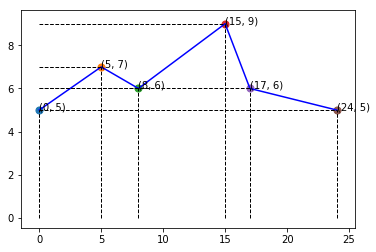

In [6]:
POINT_SIZE = 50

values = [(0, 5), (5, 7), (8, 6), (15, 9), (17, 6), (24, 5)]
x_axis = list(map(lambda x : x[0], values))
y_axis = list(map(lambda y : y[1], values))

fig, ax = plt.subplots()
plt.plot(x_axis, y_axis, color = 'b')
for i in values:
    plt.scatter(i[0], i[1], s = POINT_SIZE) # draw point s is size
    ax.annotate("(" + str(i[0]) + ", " + str(i[1]) + ")", (i[0], i[1])) # add labels
    plt.plot([i[0], i[0]], [0, i[1]], color = 'black', linewidth = 1, linestyle = 'dashed') # draw vertical lines
    plt.plot([0, i[0]], [i[1], i[1]], color = 'black', linewidth = 1, linestyle = 'dashed') # draw horizontal lines
plt.show()
